In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
import io

In [19]:
from google.colab import files
uploaded = files.upload()

Saving CAT.csv to CAT.csv


In [20]:
df = pd.read_csv(io.BytesIO(uploaded['CAT.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   57.650002   59.189999   57.509998   58.549999   40.336735   
1      1/5/2010   58.549999   59.439999   58.230000   59.250000   40.818954   
2      1/6/2010   59.180000   59.930000   59.049999   59.430000   40.942982   
3      1/7/2010   59.299999   59.900002   58.650002   59.669998   41.108299   
4      1/8/2010   59.250000   60.369999   59.250000   60.340000   41.569908   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  127.389999  127.570000  125.830002  126.250000  116.270164   
2636  6/24/2020  124.790001  124.839996  121.830002  122.059998  112.411362   
2637  6/25/2020  121.610001  124.830002  120.800003  124.709999  114.851898   
2638  6/26/2020  124.330002  124.440002  121.449997  122.389999  112.715286   
2639  6/29/2020  123.720001  126.040001  123.279999  125.250000  115.349205   

         Average  
0      54.647347  
1      55.257

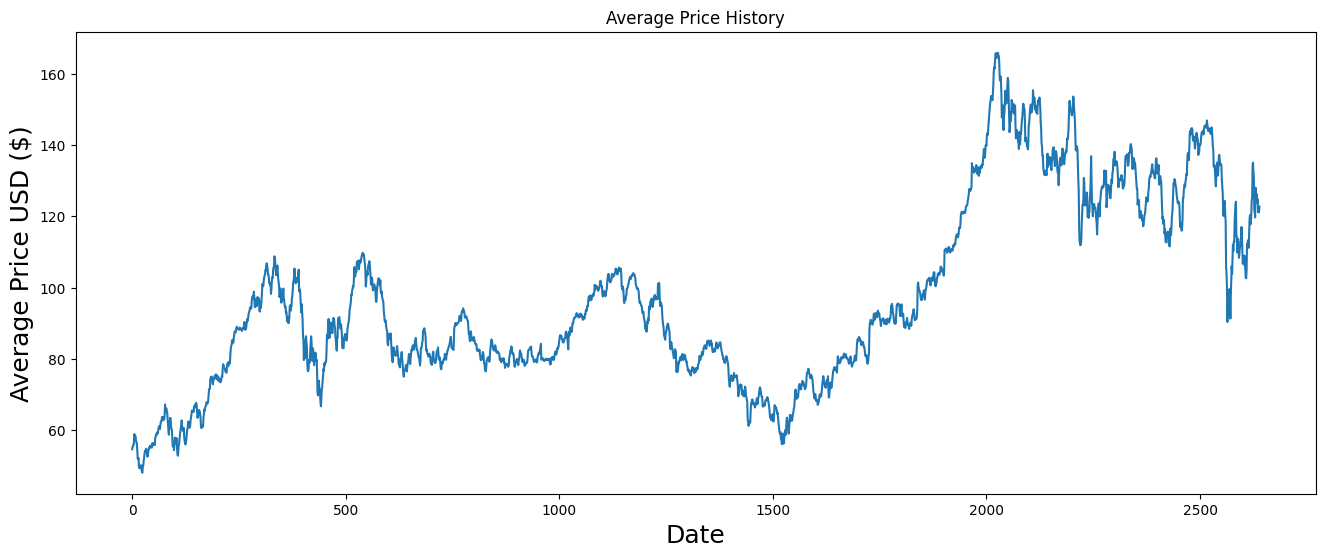

In [21]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [22]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

2508

In [23]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 2640


array([[-1.6516675 ],
       [-1.62769252],
       [-1.61006581],
       ...,
       [ 0.96846554],
       [ 0.95686681],
       [ 1.02217212]])

In [24]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-1.6516675 , -1.62769252, -1.61006581, -1.60931709, -1.59241635,
       -1.48440284, -1.50060035, -1.50796821, -1.5092339 , -1.55965335,
       -1.57102851, -1.58973543, -1.65837535, -1.7554894 , -1.75904512,
       -1.74685048, -1.84724958, -1.86025665, -1.85747945, -1.84612472,
       -1.83015477, -1.82851297, -1.88059365, -1.90075914, -1.91044277,
       -1.83293442, -1.83288377, -1.77812819, -1.74439365, -1.70112762,
       -1.66920847, -1.67741674, -1.66111615, -1.64581948, -1.68925937,
       -1.70019277, -1.7341097 , -1.70143053, -1.66965805, -1.6487788 ,
       -1.63023082, -1.64101745, -1.61265312, -1.61973786, -1.62360828,
       -1.62531633, -1.63432404, -1.58599508, -1.60333345, -1.60752697,
       -1.58573664, -1.59407973, -1.60497804, -1.60511704, -1.53319475,
       -1.51192945, -1.49107096, -1.49391358, -1.46790302, -1.46666154])]

 y_train [-1.4780907313468372]

x_train [array([-1.6516675 , -1.62769252, -1.61006581, -1.60931709, -1.59241635,
       -1.4

In [25]:
print(x_train.shape[1])

60


In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [27]:
import tensorflow as tf

In [28]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 60, 256)           133120    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
77/77 [==============================] - 45s 478ms/step - loss: 0.0060
Epoch 2/50
77/77 [==============================] - 21s 275ms/step - loss: 0.0060
Epoch 3/50
77/77 [==============================] - 20s 257ms/step - loss: 0.0061
Epoch 4/50
77/77 [==============================] - 21s 273ms/step - loss: 0.0059
Epoch 5/50
77/77 [==============================] - 21s 275ms/step - loss: 0.0053
Epoch 6/50
77/77 [==============================] - 20s 258ms/step - loss: 0.0056
Epoch 7/50
77/77 [==============================] - 21s 273ms/step - loss: 0.0054
Epoch 8/50
77/77 [==============================] - 20s 256ms/step - loss: 0.0053
Epoch 9/50
77/77 [==============================] - 21s 271ms/step - loss: 0.0056
Epoch 10/50
77/77 [==============================] - 21s 277ms/step - loss: 0.0053
Epoch 11/50
77/77 [==============================] - 20s 256ms/step - loss: 0.0054
Epoch 12/50
77/77 [==============================] - 21s 273ms/step - loss: 0.0053
Epoch 13/50
7

In [31]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  192
5/5 [==============================] - 2s 133ms/step


3.254524094085545

<ipython-input-32-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


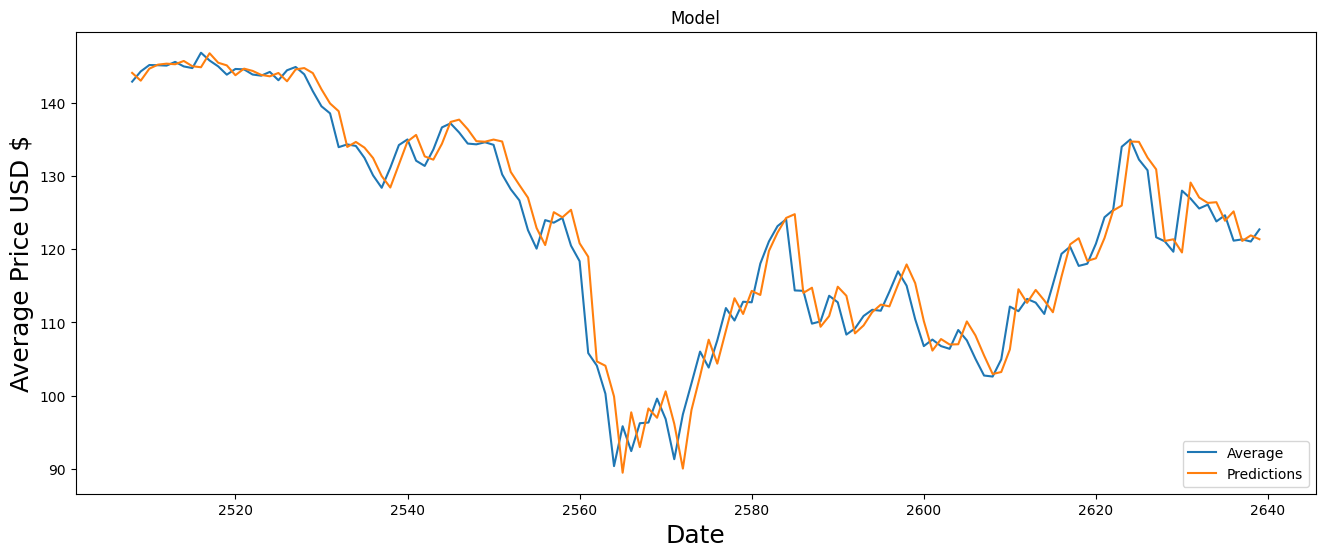

In [32]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [33]:
test[:]

,Average,Predictions
2508,142.939920,144.136734
2509,144.338095,143.072128
2510,145.212647,144.715347
2511,145.183771,145.262863
2512,145.131897,145.398422
...,...,...
2635,124.662033,123.914139
2636,121.186272,125.190506
2637,121.360381,121.143951
2638,121.065057,121.906693
